# R 데이터 세트 활용

In [1]:
import statsmodels.api as sm

In [6]:
#아동 건강 및 발달 연구의 데이터
child_smoke = sm.datasets.get_rdataset("Gestation","mosaicData")
print(child_smoke.__doc__)


.. container::

   .. container::

      ========= ===============
      Gestation R Documentation
      ========= ===============

      .. rubric:: Data from the Child Health and Development Studies
         :name: data-from-the-child-health-and-development-studies

      .. rubric:: Description
         :name: description

      Birth weight, date, and gestational period collected as part of
      the Child Health and Development Studies in 1961 and 1962.
      Information about the baby's parents — age, education, height,
      weight, and whether the mother smoked is also recorded.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         data(Gestation)

      .. rubric:: Format
         :name: format

      A data frame with 1236 observations on the following variables.

      ``id``
         identification number

      ``plurality``
         all "single fetus" in this data set

      ``outcome``
         all "live birth" (survived at least 28 days) in this da

In [ ]:
#데이터 세트 유형 확인
type(child_smoke)

statsmodels.datasets.utils.Dataset

In [8]:
child_smoke.data.head()

,id,plurality,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,single fetus,live birth,1964-11-11,284.0,male,120,1,asian,27.0,...,asian,31.0,College graduate,65.0,110.0,married,2500-5000,never,never smoked,never
1,20,single fetus,live birth,1965-02-07,282.0,male,113,2,white,33.0,...,white,38.0,College graduate,70.0,148.0,married,10000-12500,never,never smoked,never
2,58,single fetus,live birth,1965-04-25,279.0,male,128,1,white,28.0,...,white,32.0,8th -12th grade - did not graduate,NaN,NaN,married,5000-7500,now,still smokes,1-4 per day
3,61,single fetus,live birth,1965-02-12,NaN,male,123,2,white,36.0,...,white,43.0,HS+some college,68.0,197.0,married,20000-22500,"once did, not now",2 to 3 years ago,20-29 per day
4,72,single fetus,live birth,1964-11-25,282.0,male,108,1,white,23.0,...,white,24.0,College graduate,NaN,NaN,married,2500-5000,now,still smokes,20-29 per day


In [ ]:
#데이터프레임 데이터 추출, 무작위로 50개의 데이터를 추출후 인덱스 재설정
df = child_smoke.data.sample(50,random_state=0).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         50 non-null     int64  
 1   plurality  50 non-null     object 
 2   outcome    50 non-null     object 
 3   date       50 non-null     object 
 4   gestation  50 non-null     float64
 5   sex        50 non-null     object 
 6   wt         50 non-null     int64  
 7   parity     50 non-null     int64  
 8   race       48 non-null     object 
 9   age        50 non-null     float64
 10  ed         50 non-null     object 
 11  ht         49 non-null     float64
 12  wt.1       49 non-null     float64
 13  drace      49 non-null     object 
 14  dage       50 non-null     float64
 15  ded        50 non-null     object 
 16  dht        32 non-null     float64
 17  dwt        32 non-null     float64
 18  marital    50 non-null     object 
 19  inc        49 non-null     object 
 20  smoke      5

In [10]:
df.head()

,id,plurality,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,7684,single fetus,live birth,1965-07-07,269.0,male,109,1,white,23.0,...,white,25.0,8th -12th grade - did not graduate,NaN,NaN,married,7500-10000,never,never smoked,never
1,2503,single fetus,live birth,1965-02-05,336.0,male,127,6,mex,29.0,...,mex,32.0,8th -12th grade - did not graduate,NaN,NaN,married,5000-7500,never,never smoked,never
2,8248,single fetus,live birth,1965-09-10,270.0,male,112,1,asian,29.0,...,asian,40.0,College graduate,67.0,145.0,married,5000-7500,never,never smoked,never
3,6344,single fetus,live birth,1964-12-06,264.0,male,114,2,white,26.0,...,white,29.0,College graduate,72.0,190.0,married,2500-5000,now,still smokes,5-9 per day
4,6741,single fetus,live birth,1965-02-22,268.0,male,79,1,white,36.0,...,white,39.0,HS+some college,NaN,NaN,married,10000-12500,never,never smoked,never


# 회귀분석

In [11]:
#데이터 전처리
#gestation과 wt 열에 결측값이 있는 행을 삭제
df.dropna(subset=['gestation','wt'],inplace=True)

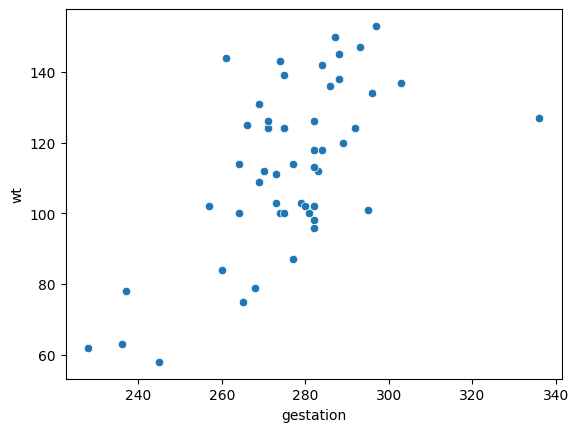

In [12]:
#산점도 분석
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='gestation', y='wt', data=df)
plt.show()

# 상관분석

In [13]:
#독립변수와 종속변수의 상관계수
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df['gestation'], df['wt'])
print(f"Pearson 상관계수: {pearson_corr:.3f}, p-값: {pearson_p:.3f}")

if pearson_p < 0.05:
    print("Pearson 상관계수는 통계적으로 유의함.")
else:
    print("Pearson 상관계수는 통계적으로 유의하지 않음.")

Pearson 상관계수: 0.627, p-값: 0.000
Pearson 상관계수는 통계적으로 유의함.


# 회귀계수의 추정

In [14]:
import statsmodels.formula.api as smf

#회귀모형 생성
formula = 'wt ~ gestation'

#OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

#summary 메서드로 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     wt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     31.15
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.09e-06
Time:                        09:00:23   Log-Likelihood:                -216.24
No. Observations:                  50   AIC:                             436.5
Df Residuals:                      48   BIC:                             440.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -120.1583     41.854     -2.871      0.0

# 회귀진단

In [30]:
def plotResiduals(model):
    import matplotlib.pyplot as plt  
    import seaborn as sns  
    import numpy as np  
    import scipy.stats as stats  

    # 서브플롯 생성  
    fig, ax = plt.subplots(2, 2, figsize=(12, 6))  

    # fitted model에서 잔차와 예측값 추출  
    resid = np.array(model.resid)  
    fitted = np.array(model.fittedvalues)  

    # Q-Q Plot 그리기  
    stats.probplot(  
        resid,                # probability plot  
        dist=stats.norm,      # 잔차, 기준분포는 정규분포  
        sparams=(0,1),        # 정규분포의 평균과 표준편차  
        plot=ax[0,0],         # 서브플롯 지정  
    )  
    ax[0,0].set_title("Normal Q-Q Plot")

    #scatter plot
    sns.scatterplot(
        x=fitted, # 예측값
        y=resid, # 잔차
        ax=ax[0,1] # 서브플롯 지정
    )
    ax[0,1].axhline(0, color='red', linewidth=2) # 가로선
    ax[0,1].set_xlabel("Fitted values")
    ax[0,1].set_ylabel("Residuals")
    ax[0,1].set_title("Residual Plot")

    #Histogram
    sns.histplot(
        resid, # 잔차
        bins=10, # 히스토그램 구간 수
        ax=ax[1,0] # 서브플롯 지정
    )

    ax[1,0].set_xlabel("Residuals")
    ax[1,0].set_title("Histogram of Residuals")

    #Scale-Location plot
    sns.regplot(
        x=fitted,
        y=np.sqrt(np.abs(resid)), # 잔차의 제곱근
        scatter=True, # 점 표시
        lowess=True, # lowess smoothing
        line_kws={'color': 'red', 'lw': 2}, # 회귀선 스타일
        ax=ax[1,1] # 서브플롯 지정
        )
    ax[1,1].set_xlabel("Fitted values")
    ax[1,1].set_title("Scale_Location Plot")

    plt.tight_layout()
    plt.show()



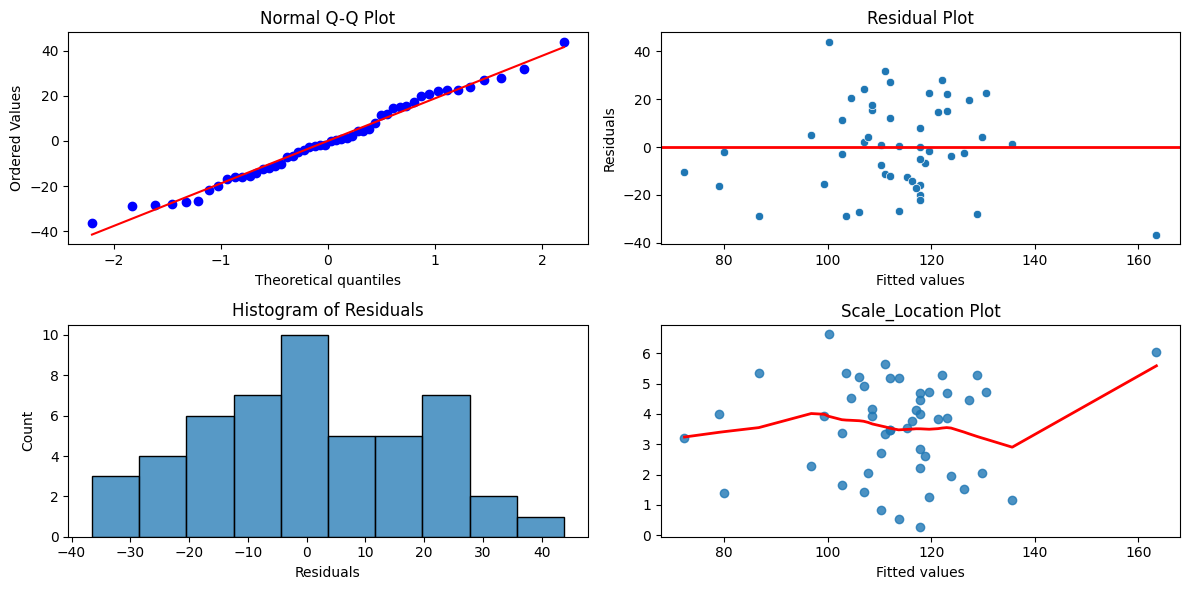

In [31]:
plotResiduals(model)

# 이상치 분석

In [32]:
def showOutlier(df, x, y, model, outliers, title='태아의 체중(wt) vs. 임신기간(gestation)'):
    import koreanize_matplotlib

    # 산점도 그래프
    df.plot(
        kind='scatter',
        x=x,
        y=y,
        title=title
    )

    # 이상치를 빨간색으로 표시하고 id 표시
    for outlier in outliers:
        plt.scatter(df[x][outlier], df[y][outlier], color='r')
        plt.text(df[x][outlier]+2, df[y][outlier], df['id'][outlier], fontsize=10)

    # 회귀선 그리기
    plt.plot(df[x], model.fittedvalues, color='red')

    plt.show()


In [33]:
#영향점 계산
import numpy as np
infl = model.get_influence()

Outliers using Leverage: 
       id  gestation   wt
1   2503      336.0  127
7   7544      245.0   58
13  8187      236.0   63
18  6977      237.0   78
28  7334      228.0   62


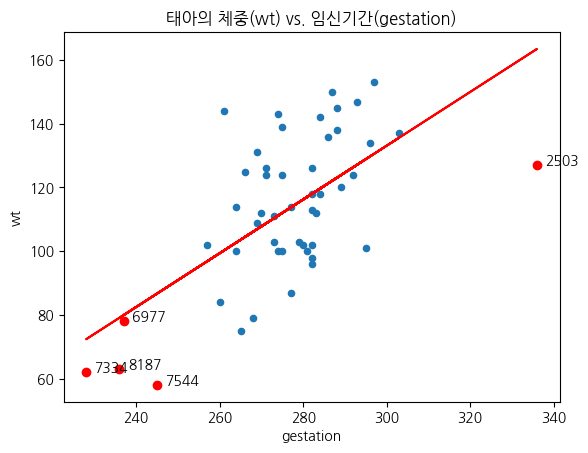

In [ ]:
#독립변수 관점의 이상치 탐색
#레버리지 계산
# 레버리지 계산
leverage = infl.hat_matrix_diag

# 레버리지가 큰 관측치 확인
outliers = np.where(leverage > 2*np.mean(leverage))[0]
print('Outliers using Leverage: \n', df.iloc[outliers][['id', 'gestation', 'wt']])

# 이상치 시각화
showOutlier(df, 'gestation', 'wt', model, outliers)


Outliers using Leverage: 
      id  gestation   wt
1  2503      336.0  127


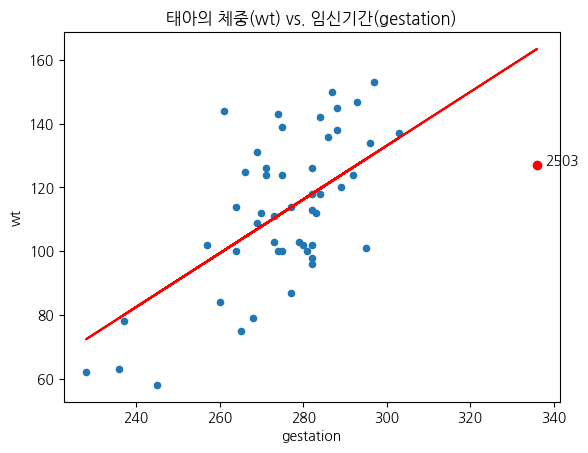

In [35]:
#회귀모형 관점의 이상치 탐색
#DFFIS 꼐산
(dffits, p) = infl.dffits_internal
# DFFIS가 큰 관측치 확인
outliers = np.where(np.abs(dffits) > 1)[0]
print('Outliers using Leverage: \n', df.iloc[outliers][['id', 'gestation', 'wt']])

# 이상치 시각화
showOutlier(df, 'gestation', 'wt', model, outliers)

# 연습

R데이터 세트 활용

In [36]:
import statsmodels.api as sm

In [55]:
#호주 의료 서비스 이용률 데이터
Aus_Doc = sm.datasets.get_rdataset("DoctorVisits","AER")
print(Aus_Doc.__doc__)

.. container::

   .. container::

      ============ ===============
      DoctorVisits R Documentation
      ============ ===============

      .. rubric:: Australian Health Service Utilization Data
         :name: australian-health-service-utilization-data

      .. rubric:: Description
         :name: description

      Cross-section data originating from the 1977–1978 Australian
      Health Survey.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         data("DoctorVisits")

      .. rubric:: Format
         :name: format

      A data frame containing 5,190 observations on 12 variables.

      visits
         Number of doctor visits in past 2 weeks.

      gender
         Factor indicating gender.

      age
         Age in years divided by 100.

      income
         Annual income in tens of thousands of dollars.

      illness
         Number of illnesses in past 2 weeks.

      reduced
         Number of days of reduced activity in past 2 weeks due to
   

In [56]:
#데이터 세트 유형 확인
type(Aus_Doc)

statsmodels.datasets.utils.Dataset

In [57]:
Aus_Doc.data.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [58]:
#데이터프레임 데이터 추출, 무작위로 50개의 데이터를 추출후 인덱스 재설정
df = Aus_Doc.data.sample(50,random_state=0).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     50 non-null     int64  
 1   gender     50 non-null     object 
 2   age        50 non-null     float64
 3   income     50 non-null     float64
 4   illness    50 non-null     int64  
 5   reduced    50 non-null     int64  
 6   health     50 non-null     int64  
 7   private    50 non-null     object 
 8   freepoor   50 non-null     object 
 9   freerepat  50 non-null     object 
 10  nchronic   50 non-null     object 
 11  lchronic   50 non-null     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 4.8+ KB


In [59]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,0,male,0.22,0.75,0,0,0,yes,no,no,no,no
1,0,female,0.57,0.25,5,0,4,no,no,yes,no,yes
2,0,male,0.19,0.25,1,0,3,no,yes,no,no,no
3,1,female,0.32,1.30,2,0,0,yes,no,no,no,yes
4,2,male,0.72,0.90,4,0,1,yes,no,no,yes,no


회귀분석

In [60]:
#데이터 전처리
#gestation과 wt 열에 결측값이 있는 행을 삭제
df.dropna(subset=['age','income'],inplace=True)

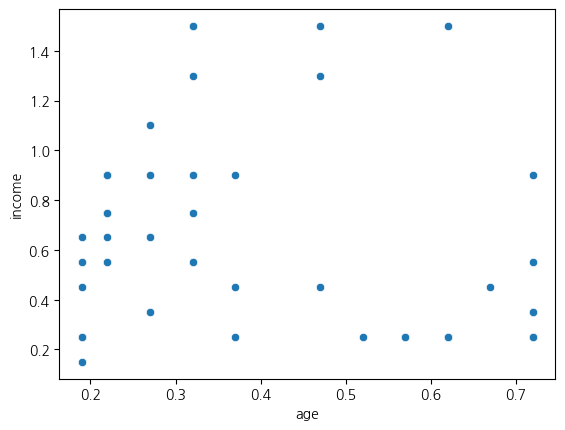

In [61]:
#산점도 분석
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age', y='income', data=df)
plt.show()

상관분석

In [62]:
#독립변수와 종속변수의 상관계수
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df['age'], df['income'])
print(f"Pearson 상관계수: {pearson_corr:.3f}, p-값: {pearson_p:.3f}")

if pearson_p < 0.05:
    print("Pearson 상관계수는 통계적으로 유의함.")
else:
    print("Pearson 상관계수는 통계적으로 유의하지 않음.")

Pearson 상관계수: -0.319, p-값: 0.024
Pearson 상관계수는 통계적으로 유의함.


회귀계수 추정

In [63]:
import statsmodels.formula.api as smf

#회귀모형 생성
formula = 'age ~ income'

#OLS 클래스로 선형회귀모형의 객체를 생성하고 fit 메서드로 모형 추정
model = smf.ols(formula, data=df).fit()

#summary 메서드로 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     5.450
Date:                Tue, 01 Jul 2025   Prob (F-statistic):             0.0238
Time:                        09:34:34   Log-Likelihood:                 10.909
No. Observations:                  50   AIC:                            -17.82
Df Residuals:                      48   BIC:                            -13.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5304      0.052     10.144      0.0

회귀진단

In [66]:
def plotResiduals(model):
    import matplotlib.pyplot as plt  
    import seaborn as sns  
    import numpy as np  
    import scipy.stats as stats  

    # 서브플롯 생성  
    fig, ax = plt.subplots(2, 2, figsize=(12, 6))  

    # fitted model에서 잔차와 예측값 추출  
    resid = np.array(model.resid)  
    fitted = np.array(model.fittedvalues)  

    # Q-Q Plot 그리기  
    stats.probplot(  
        resid,                # probability plot  
        dist=stats.norm,      # 잔차, 기준분포는 정규분포  
        sparams=(0,1),        # 정규분포의 평균과 표준편차  
        plot=ax[0,0],         # 서브플롯 지정  
    )  
    ax[0,0].set_title("Normal Q-Q Plot")

    #scatter plot
    sns.scatterplot(
        x=fitted, # 예측값
        y=resid, # 잔차
        ax=ax[0,1] # 서브플롯 지정
    )
    ax[0,1].axhline(0, color='yellow', linewidth=2) # 가로선
    ax[0,1].set_xlabel("Fitted values")
    ax[0,1].set_ylabel("Residuals")
    ax[0,1].set_title("Residual Plot")

    #Histogram
    sns.histplot(
        resid, # 잔차
        bins=10, # 히스토그램 구간 수
        ax=ax[1,0] # 서브플롯 지정
    )

    ax[1,0].set_xlabel("Residuals")
    ax[1,0].set_title("Histogram of Residuals")

    #Scale-Location plot
    sns.regplot(
        x=fitted,
        y=np.sqrt(np.abs(resid)), # 잔차의 제곱근
        scatter=True, # 점 표시
        lowess=True, # lowess smoothing
        line_kws={'color': 'green', 'lw': 2}, # 회귀선 스타일
        ax=ax[1,1] # 서브플롯 지정
        )
    ax[1,1].set_xlabel("Fitted values")
    ax[1,1].set_title("Scale_Location Plot")

    plt.tight_layout()
    plt.show()



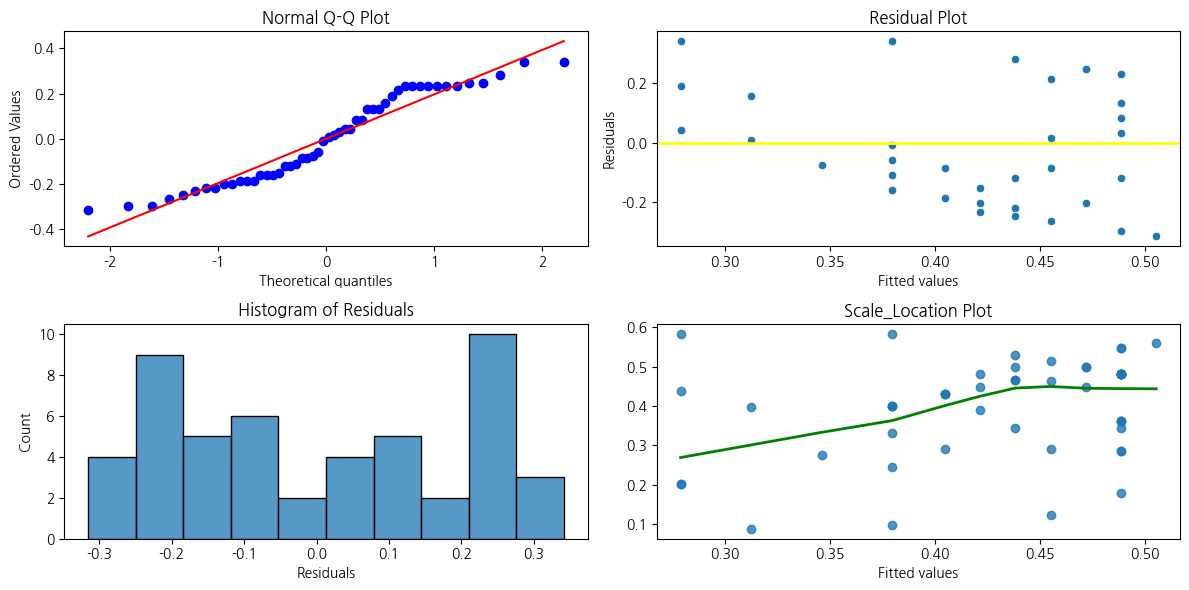

In [67]:
plotResiduals(model)

이상치 분석

In [72]:
def showOutlier(df, x, y, model, outliers, title='나이(age) vs. 수입(income)'):
    import koreanize_matplotlib

    # 산점도 그래프
    df.plot(
        kind='scatter',
        x=x,
        y=y,
        title=title
    )

    # 방문율을 빨간색으로 표시하고 visits 표시
    for outlier in outliers:
        plt.scatter(df[x][outlier], df[y][outlier], color='r')
        plt.text(df[x][outlier]+2, df[y][outlier], df['visits'][outlier], fontsize=10)

    # 회귀선 그리기
    plt.plot(df[x], model.fittedvalues, color='red')

    plt.show()


In [73]:
#영향점 계산
import numpy as np
infl = model.get_influence()

Outliers using Leverage: 
     visits   age  income
3        1  0.32     1.3
6        0  0.32     1.5
15       1  0.47     1.5
24       8  0.62     1.5
38       0  0.32     1.5
48       0  0.47     1.3


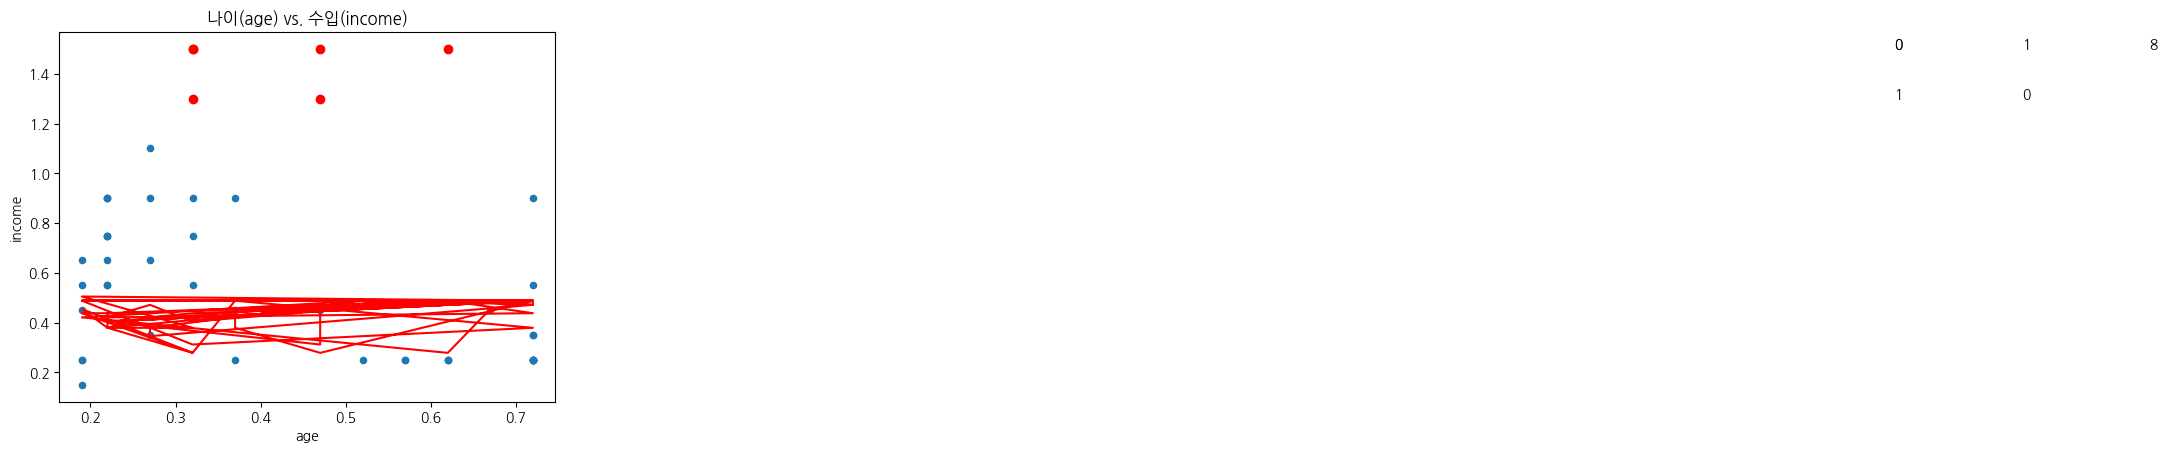

In [75]:
#독립변수 관점의 이상치 탐색
#레버리지 계산
# 레버리지 계산
leverage = infl.hat_matrix_diag

# 레버리지가 큰 관측치 확인
outliers = np.where(leverage > 2*np.mean(leverage))[0]
print('Outliers using Leverage: \n', df.iloc[outliers][['visits', 'age', 'income']])

# 방문률 시각화
showOutlier(df, 'age', 'income', model, outliers)


Outliers using Leverage: 
 Empty DataFrame
Columns: [visits, age, income]
Index: []


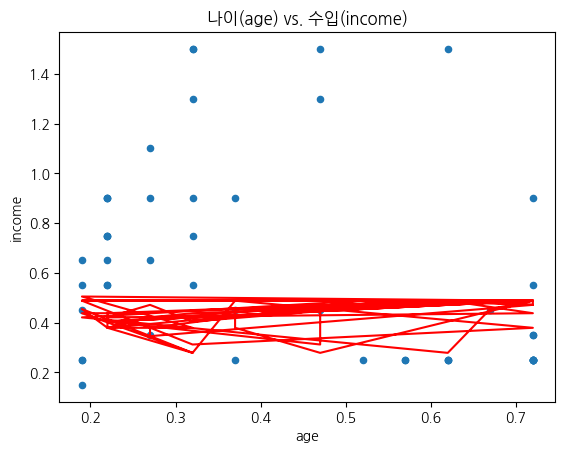

In [76]:
#회귀모형 관점의 방문율 탐색
#DFFIS 계산
(dffits, p) = infl.dffits_internal
# DFFIS가 큰 관측치 확인
outliers = np.where(np.abs(dffits) > 1)[0]
print('Outliers using Leverage: \n', df.iloc[outliers][['visits', 'age', 'income']])

# 이상치 시각화
showOutlier(df, 'age', 'income', model, outliers)